Haussdorf Metrics and Loss Function
====
Using the Haussdorf distance we can hopefully improve our image segmentation algorithms.

The Haussdorf distance between two objects is defined as the maximum shortest distance from one object to another: this isn't a very helpful definition, so a diagram is helpful:

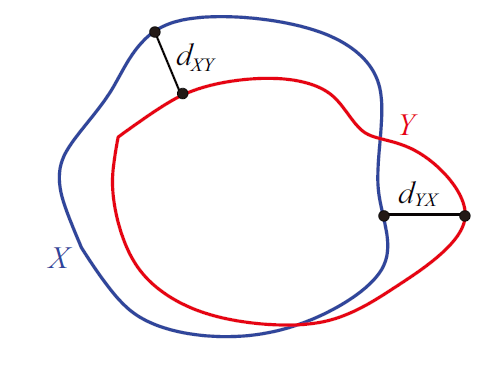

In [1]:
from PIL import Image

Image.open("img/haussdorf.png")

If we choose any point on X, we can find the shortest distance to Y; by choosing the right point on X, we can find the largest such distance ($d_{XY}$).
Similarly, we can find the greatest shortest distance from Y to X ($d_{YX}$).
The Haussdorf distance is defined as the greatest of these two distances.

It is a useful metric because it encapsulates our intuitive idea of "closeness".

For objects in 2d, we can work out the Haussdorf distance...

In [65]:
from typing import Union, Iterable

import numpy as np
from scipy import ndimage
from skimage import metrics
import matplotlib.pyplot as plt

IMG_SIZE = (256, 192)
RNG = np.random.default_rng(seed=0)


def gaussian_image(
    *, centre: tuple[int, int], sigma: Union[float, Iterable[float]]
) -> np.ndarray:
    """
    Binary image generated from a Gaussian, centred on the image centre

    """
    # Zeros with a 1 in the middle
    arr = np.zeros(IMG_SIZE)
    arr[centre] = 1

    # Apply a Gaussian filter to this 1 to spread it out
    arr = ndimage.gaussian_filter(arr, sigma=sigma)

    # Scale
    arr = arr / arr.max()
    arr = arr > 0.5

    return arr


# Define the two images
x_centre = (IMG_SIZE[0] // 3, IMG_SIZE[1] // 3)
x = gaussian_image(centre=x_centre, sigma=IMG_SIZE[0] // 8)

y_centre = (IMG_SIZE[0] // 2, 2 * IMG_SIZE[1] // 5)
y = gaussian_image(centre=y_centre, sigma=[IMG_SIZE[0] // 4, IMG_SIZE[1] // 7])

# Find the Hausdorff distance between them
distance = metrics.hausdorff_distance(x, y)

# For plotting, we'll also want to find the points that this corresponds to
haussdorf_points = metrics.hausdorff_pair(x, y)

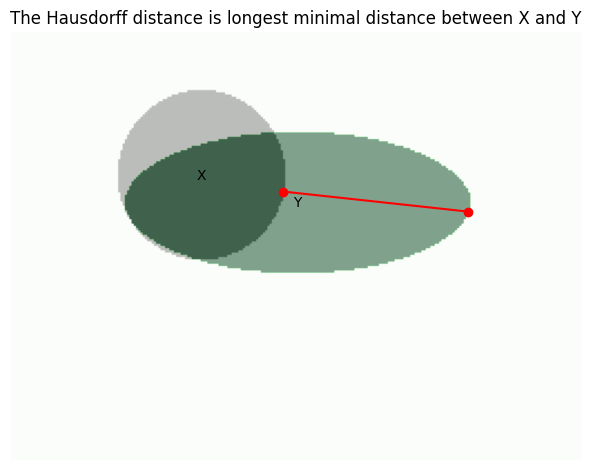

In [69]:
fig, axis = plt.subplots(1, 1)
axis.set_aspect("equal")

axis.imshow(x.T, alpha=0.5, origin="upper", cmap="Greys")
axis.imshow(y.T, alpha=0.5, origin="upper", cmap="Greens")

axis.text(*x_centre, "X", ha="center", va="center", color="black")
axis.text(*y_centre, "Y", ha="center", va="center", color="black")

hausdorff_x, hausdorff_y = zip(*haussdorf_points)
axis.plot(hausdorff_x, hausdorff_y, "ro-")

axis.set_title(f"The Hausdorff distance is longest minimal distance between X and Y")

axis.axis("off")
fig.tight_layout()